## Import the needed libraries

In [1]:
import sys
sys.path.append('..')

import src as odyn
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 

import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon, shape
from pyproj import Proj
import math

## Load probabilities

from Broome county in New York

In [2]:
county = "Broome"
state = "NY"

In [3]:
geo_df = odyn.get_county_mapping_data(county = county, state = state)
hesitancy_dict = odyn.get_hesitancy_dict(geo_df)
prob = list(hesitancy_dict.values())
geo_df

,county,state,area (km^2),population (2019),density,geometry,strongly_hesitant,hesitant_or_unsure,not_hesitant
0,Broome,NY,1853.971476,190488,102.745917,"POLYGON ((-8474771.758 5222645.052, -8474737.5...",0.05,0.0875,0.8625


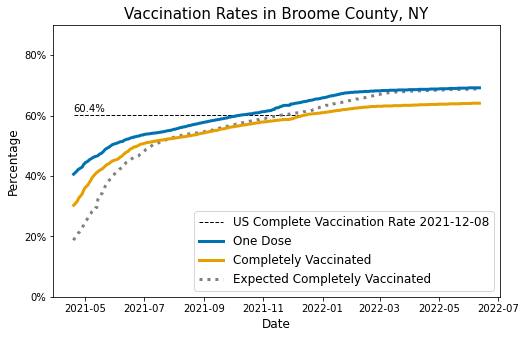

In [4]:
odyn.vaccine_trends_plot(county = county, 
                        state = state, 
                        show_us_current = True,
                        download_data = False)

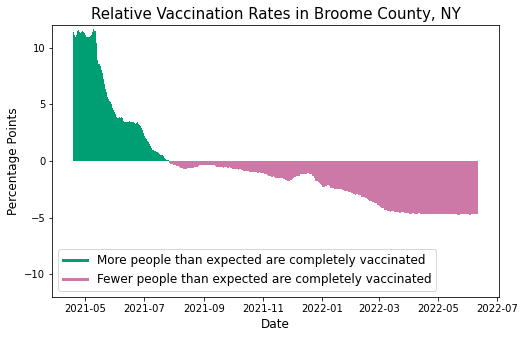

In [5]:
odyn.relative_vaccine_trends_plot(county = county, 
                        state = state, 
                        download_data = False)

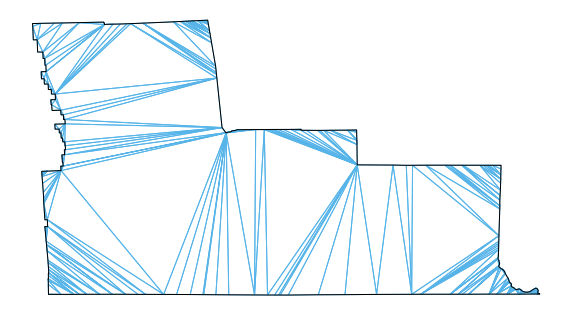

In [6]:
odyn.plot_triangulated_county(geo_df)

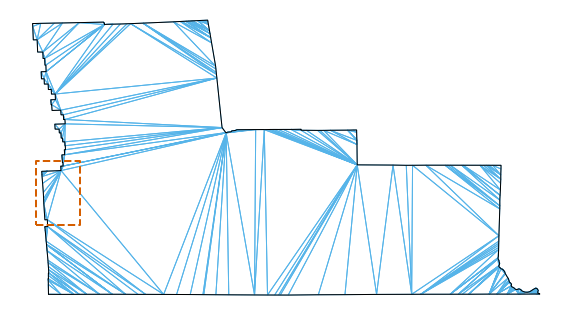

In [46]:
bounding_box = [[-76.125, 42.105], 
                [-76.058, 42.105], 
                [-76.058, 42.202], 
                [-76.125, 42.202], 
                [-76.125, 42.105]]

odyn.plot_triangulated_county(geo_df, 
                              bounding_box = bounding_box, 
                              restricted = False,
                              aspect_ratio =1)

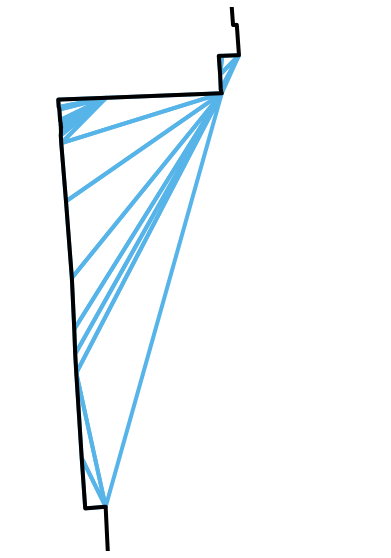

In [47]:
odyn.plot_triangulated_county(geo_df, 
                              bounding_box = bounding_box, 
                              restricted = True,
                              aspect_ratio =1)

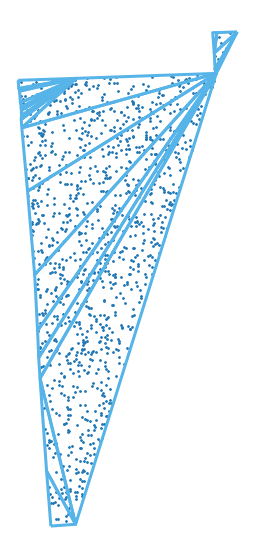

In [48]:
model = odyn.OpinionNetworkModel(probabilities = prob)
agent_df = model.add_random_agents_to_triangles( 
                                        geo_df, 
                                        bounding_box = bounding_box,
                                        show_plot = True)


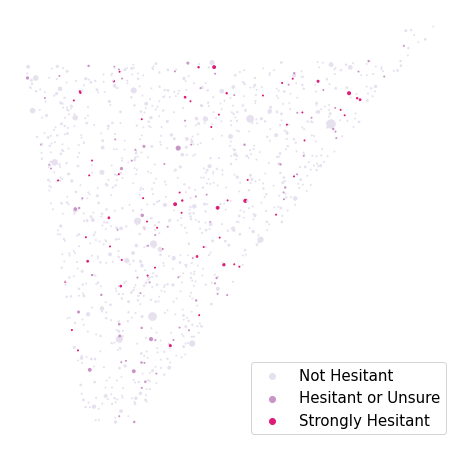

In [49]:
belief_df = model.assign_weights_and_beliefs(agent_df, show_plot = True)

In [55]:
# THIS WILL TAKE A FEW MOMENTS.
model = odyn.OpinionNetworkModel(probabilities = prob,
                                include_weight = True,
                                include_opinion = True,
                                importance_of_weight = 0.05,
                                importance_of_distance = 9)
model.populate_model(geo_df = geo_df, 
                     bounding_box = bounding_box)

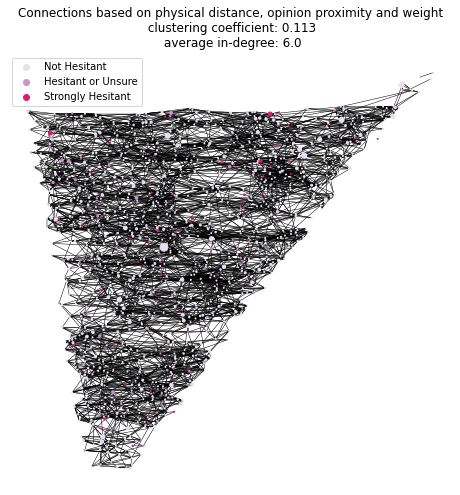

In [56]:
model.plot_initial_network()

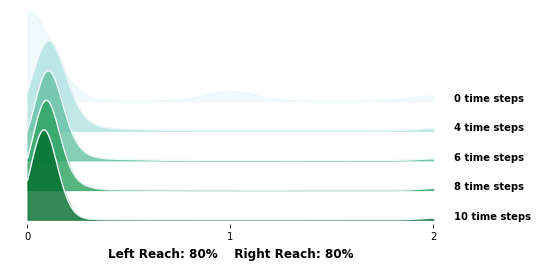

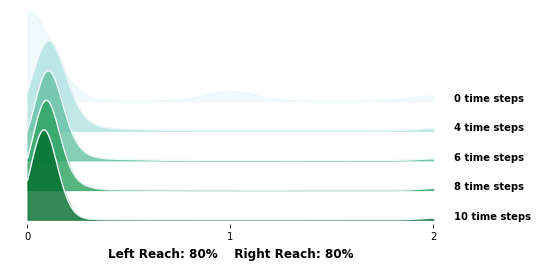

In [57]:
sim = odyn.NetworkSimulation()
sim.run_simulation(model = model)
sim.plot_simulation_results()

In [58]:
# THIS WILL TAKE A FEW MOMENTS.
model = odyn.OpinionNetworkModel(probabilities = [.45,.1,.45])
model.populate_model(num_agents = 1000)

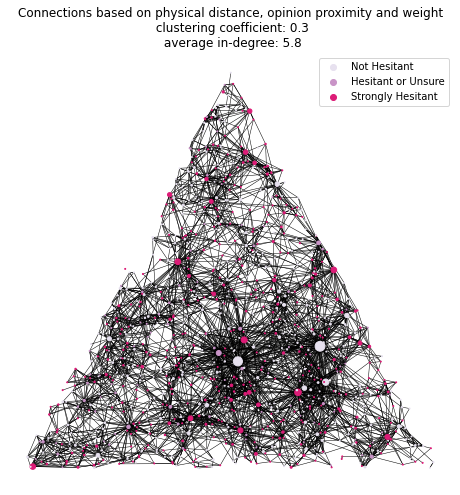

In [59]:
model.plot_initial_network()

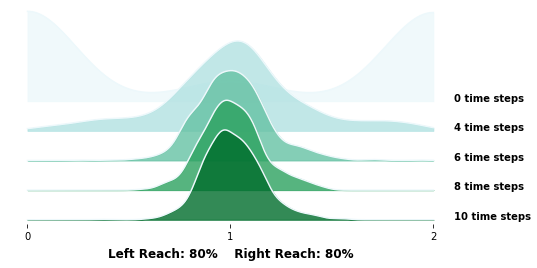

In [61]:
sim = odyn.NetworkSimulation()
sim.run_simulation(model = model,
                   store_results = True
                  )
sim.plot_simulation_results()

In [86]:
print(sim.results[0]['belief_df']['belief'].mean(axis = 0))
print(sim.results[1]['belief_df']['belief'].mean(axis = 0))

means = []
for result in sim.results:
    means.append(result['belief_df']['belief'].mean(axis = 0))

print(means)

1.0026622449231195
1.0135618989660542
[1.0026622449231195, 1.0135618989660542, 1.014198172653746, 1.0179380066893509, 1.009980814342332, 1.0125112469032627, 1.0119421012606613, 1.011168947251413, 1.0113729092392123, 1.013282799679369, 1.0115200365364692, 1.0114279270383613]


In [2]:
model = odyn.OpinionNetworkModel(probabilities = [.45,.1,.45],
                                 power_law_exponent = 3,
                                 openness_to_neighbors = 1.5,
                                 left_reach = 0.7,
                                 right_reach = 0.6)

In [3]:
model.populate_model(num_agents = 500)

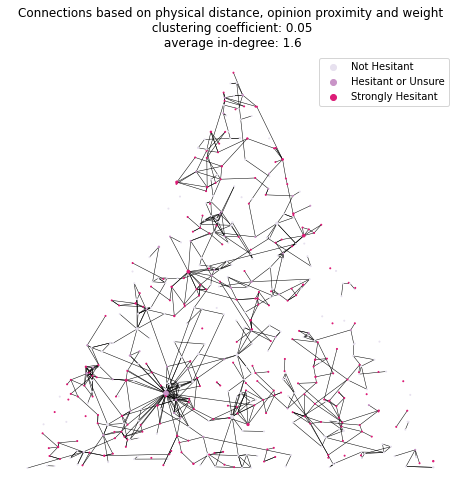

In [4]:
model.plot_initial_network()

In [5]:
sim = odyn.NetworkSimulation()

In [ ]:
sim.run_simulation(model = model,
                   store_results = True
                  )

In [ ]:
sim.plot_simulation_results()

In [ ]:
means = []
for result in sim.results:
    means.append(result['belief_df']['belief'].mean(axis = 0))

print(means)

In [2]:
model = odyn.OpinionNetworkModel(probabilities = [.45,.1,.45])
model.populate_model(num_agents = 1000)
sim = odyn.NetworkSimulation()

In [18]:
belief_df = model.belief_df
n = model.belief_df.index.shape[0]

In [11]:
prob_array = np.ones((n,n))
dist_array = np.zeros((n,n))

In [34]:
#this should be in a for loop
point_i = Point(belief_df.loc[0,'x'], belief_df.loc[0,'y'])
print(point_i)
x_y_df = belief_df[['x','y']]

POINT (521.1552397981657 104.83828712445778)


In [55]:
dist_array[0,:] = [point_i.distance(Point(belief_df.loc[j,"x"],
                                                       belief_df.loc[j,"y"])
                                                    ) for j in belief_df.index]

In [99]:
for i in range(n):
            point_i = Point(belief_df.loc[i,"x"],belief_df.loc[i,"y"])

            # Get distances from i to each other point.
            dist_array[i,:] = [point_i.distance(Point(belief_df.loc[j,"x"],
                                                       belief_df.loc[j,"y"])
                                                    ) for j in belief_df.index]

CPU times: total: 1min 11s
Wall time: 1min 11s


In [96]:
dist_array[0][14]

951.4303927595729

In [101]:
x_y_array = x_y_df.to_numpy()
dist_array_2 = np.zeros((n,n))
math.dist(x_y_array[0], x_y_array[1])
for i in range(n):
    dist_array_2[i,:] = [(math.dist(x_y_array[i], x_y_array[j])) for j in range(len(x_y_array))]

In [95]:
dist_array_2[0][14]

951.430392759573

In [94]:
truth_array = dist_array == dist_array_2
truth_array[0][14]

False

0
1
2
3
4
5
6
7
8
9
10
11
12
CPU times: total: 18min 43s
Wall time: 18min 48s


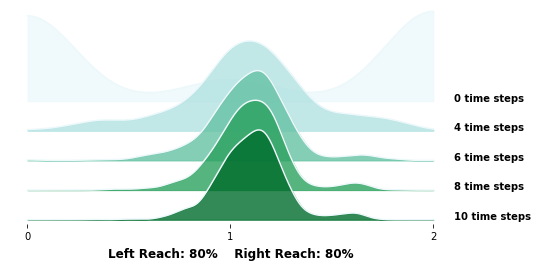

In [102]:
%%time
model = odyn.OpinionNetworkModel(probabilities = [.45,.1,.45])
model.populate_model(num_agents = 1000)
sim = odyn.NetworkSimulation()
sim.run_simulation(model = model,
           store_results = True
          )
sim.plot_simulation_results()

In [ ]:
%%time
model = odyn.OpinionNetworkModel(probabilities = [.45,.1,.45])
model.populate_model(num_agents = 1000)
sim = odyn.NetworkSimulation()
sim.run_simulation(model = model,
           store_results = True
          )
sim.plot_simulation_results()

NameError: name 'odyn' is not defined

In [2]:
model = odyn.OpinionNetworkModel(probabilities = [.45,.1,.45], importance_of_distance = 8.5)
agent_df = model.add_random_agents_to_triangle(num_agents = 1000, 
                                                        geo_df = None,
                                                        show_plot = False)

In [3]:
belief_df = model.assign_weights_and_beliefs(agent_df)

In [4]:
prob_df = model.compute_probability_array(belief_df)
adjacency_df = model.compute_adjacency(prob_df)

In [5]:
mega_influencer_df = model.connect_mega_influencers(belief_df)

In [30]:
# cc, md = model.compute_network_stats(adjacency_df)
# Enterinng the above function
cc = 0
degrees = []

In [31]:
import itertools

In [32]:
i = 0
nbhd = np.where(adjacency_df.loc[:,i] != 0)[0]
deg = len(nbhd)
degrees.append(deg)
cc_i = 0
if deg > 2:
    C = list(itertools.permutations(nbhd,2))
    cc_i = np.sum([int(adjacency_df.loc[c[0],c[1]] > 0) for c in C]
                                        ) / math.perm(deg,2)


cc += cc_i

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
